In [27]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
# 📌 Step 2: Load Excel Data
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Customer_Churn.xlsx"
df = pd.read_excel(file_path)

In [29]:
# Display first rows
df.head()

,CustomerID,Age,Gender,PurchaseHistory,Segment
0,1,56,Male,11,Medium
1,2,69,Male,7,High
2,3,46,Male,1,Low
3,4,32,Male,1,Low
4,5,60,Male,13,Low


In [30]:
# 📌 Step 3: Preprocessing
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Segment'] = le.fit_transform(df['Segment'])

In [31]:
# Optional: Target variable (Assuming we have 'Churn' column 1=Leave, 0=Stay)
# If not in your Excel, create a dummy target for demo
if 'Churn' not in df.columns:
    df['Churn'] = np.random.randint(0, 2, df.shape[0])

In [32]:
# Features and Target
X = df[['Age', 'Gender', 'PurchaseHistory', 'Segment']]
y = df['Churn']

In [33]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# 📌 Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [35]:
# 📌 Step 5: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# 📌 Step 6: Prediction
y_pred = model.predict(X_test)

In [37]:
# 📌 Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



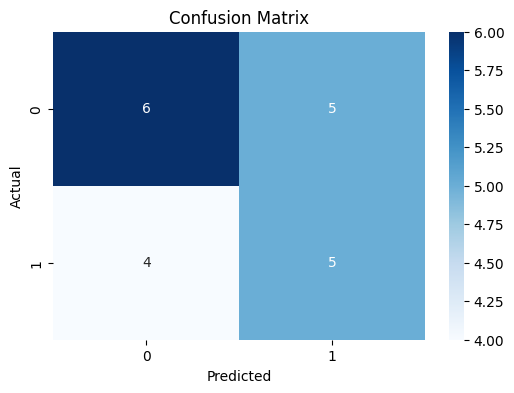

In [38]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
# 📌 Step 8: Save Predictions
output_df = X.copy()
output_df['Churn_Predicted'] = model.predict(X_scaled)
output_df.to_excel(r"D:\personal\bdas.spyberpolymath.com\project\data_output\churn_predictions.xlsx", index=False)